# SUPERSTORE_SALES 23/1/2024
##### VÕ HỬU NGHĨA



 IMPORT CÁC THƯ VIỆN CẦN THIẾT

In [110]:
import pandas as pd
import re
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

ĐỌC TẬP DỮ LIỆU BẰNG THƯ VIỆN PANDAS

In [111]:
df = pd.read_csv('D:/Python-for-Data-Analyst/DataSet/SuperStore_Sales.csv')
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


HIỂN THỊ TỔNG SỐ DÒNG VÀ CỘT

In [112]:
df.shape

(9800, 18)

- Dữ liệu có tổng số dòng là 9800 và bao gồm 18 thuộc tính

HIỂN THỊ CHI TIẾT CÁC THUỘC TÍNH

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

- Cột Order Date và Ship Date cần được điều chỉnh sang dạng datetime

CHUẨN HÓA TÊN CỘT

In [114]:
columns = df.columns
# Thay thế khoảng trắng và '-' bằng '_' và viết thường toàn bộ tên cột
df.columns = [re.sub("[ -]","_",c).lower().strip() for c in columns]
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


- Khi đã được chuẩn hóa sẽ giúp ta không phải mất thời gian để nhớ định dạng của tên từng thuộc tính

TÍNH TỔNG SỐ GIÁ TRỊ NULL CỦA TỪNG THUỘC TÍNH 

In [115]:
df.isnull().sum()


row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
dtype: int64

- Những thuộc tính quan trọng đều không có giá trị null

ĐIỀU CHỈNH ĐỊNH DẠNG CHO CỘT ORDER_DATE ĐỂ SỬ DỤNG METHOD PD.TO_DATETIME

In [116]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y')

LẤY RA GIÁ TRỊ 2 CỘT LÀ NĂM VÀ THÁNG-NĂM CỦA CỘT ORDER_DATE

In [117]:
df["order_year"] = df['order_date'].dt.year
df['order_year_month']= df['order_date'].astype(str).str[:7]
df[['order_date','order_year','order_year_month']]

,order_date,order_year,order_year_month
0,2017-11-08,2017,2017-11
1,2017-11-08,2017,2017-11
2,2017-06-12,2017,2017-06
3,2016-10-11,2016,2016-10
4,2016-10-11,2016,2016-10
...,...,...,...
9795,2017-05-21,2017,2017-05
9796,2016-01-12,2016,2016-01
9797,2016-01-12,2016,2016-01
9798,2016-01-12,2016,2016-01


HIỂN THỊ MIN, MAX CỦA CỘT ORDER_DATE

In [118]:
df['order_date'].agg(['min','max'])

min   2015-01-03
max   2018-12-30
Name: order_date, dtype: datetime64[ns]

KIỂM TRA SỐ THÁNG CỦA TỪNG NĂM

In [119]:
df.groupby('order_year')['order_year_month'].nunique().sort_index()

order_year
2015    12
2016    12
2017    12
2018    12
Name: order_year_month, dtype: int64

- Như vậy có dữ liệu đầy đủ 12 tháng ở các năm

TỔNG SỐ ORDER THEO NĂM

In [120]:
# Một order sẽ có 1 hoặc nhiều item, nên cần tính giá trị theo order_id chứ không phải theo row(hàng)
df.groupby('order_year')\
    .agg(n_orders=('order_id',"nunique"))\
    .sort_index()

,n_orders
order_year,
2015,947
2016,1019
2017,1295
2018,1661


- Số lượng order tăng theo từng năm, đây là dấu hiệu tích cực

TỔNG SỐ ORDER THEO TỪNG THÁNG THEO NĂM

In [121]:
df.groupby('order_year_month')\
    .agg(n_orders = ('order_id','nunique'))\
    .sort_index().T

order_year_month,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,...,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
n_orders,30,28,69,63,68,64,64,70,129,78,...,117,115,116,129,108,109,222,144,259,223


- Kết quả chi tiết, tuy nhiên khó có thể hiểu được gì về kết quả, chúng ta cần trực quan chúng

GẮN GIÁ TRỊ TÊN CHO BIẾN agg_monthly_orders

In [122]:
agg_monthly_orders= df.groupby('order_year_month')\
    .agg(n_orders = ('order_id','nunique'))\
    .sort_index().reset_index()
agg_monthly_orders.head(3)

,order_year_month,n_orders
0,2015-01,30
1,2015-02,28
2,2015-03,69


BIỂU ĐỒ TRỰC QUAN HÓA KẾT QUẢ TRÊN

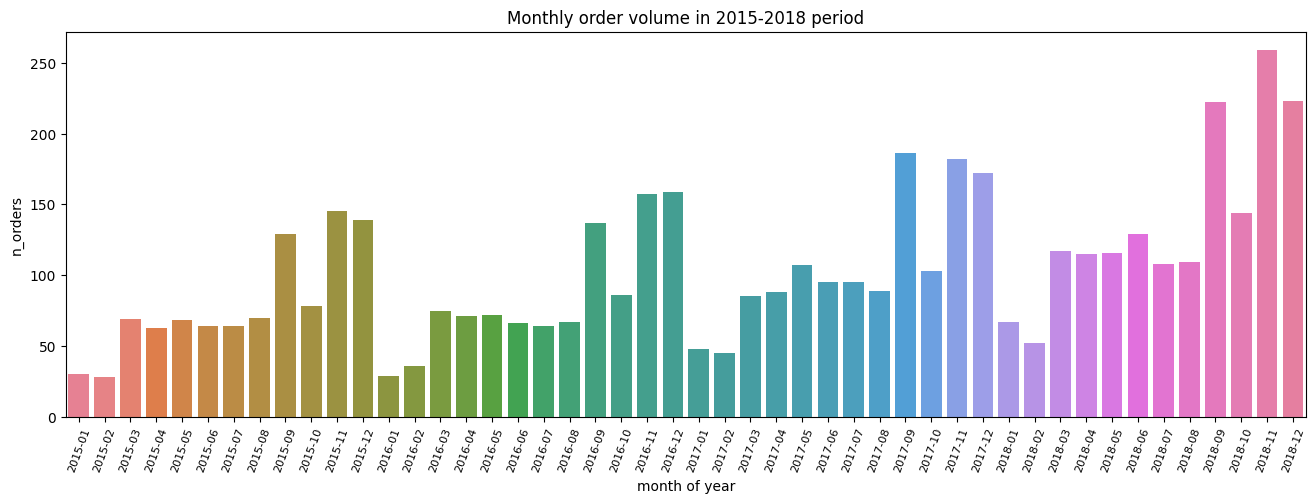

In [123]:
fig,ax = plt.subplots(figsize =(16,5))
sns.barplot(agg_monthly_orders,x='order_year_month',y='n_orders',native_scale=True,estimator="sum",errorbar=None,hue='order_year_month')
plt.xlabel('month of year')
plt.ylabel('n_orders')
plt.title('Monthly order volume in 2015-2018 period')
plt.xticks(agg_monthly_orders['order_year_month'],rotation = 70,size= 8)
plt.show()



- Nhìn chung qua các năm đều có sự tăng trưởng 
-Hình dạng của biểu đồ ở các năm khá giống nhau, thấp ở 3 tháng đầu, và cao nhất ở 4 tháng cuối(trừ tháng 10)

TRÍCH XUẤT DỮ LIỆU CỦA NĂM 2016

In [124]:
df_2016 = df[df['order_date'].dt.year == 2016]

HIỂN THỊ MIN, MAX CỦA CỘT ORDER_DATE NĂM 2016

In [125]:
df_2016['order_date'].agg(['min','max'])

min   2016-01-02
max   2016-12-31
Name: order_date, dtype: datetime64[ns]

In [126]:
df_2016.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub_category,product_name,sales,order_year,order_year_month
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016,2016-10
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016,2016-10


TÍNH TỔNG GIÁ TRỊ SALES CỦA TỪNG SẢN PHẨM DỰA THEO product_id,product_name VÀ category

In [127]:
top_10_products_sales = df_2016.groupby(['product_id','product_name','category'])\
    .agg(total_sales = ('sales','sum'))\
    .nlargest(10,'total_sales')\
    .reset_index()
top_10_products_sales

,product_id,product_name,category,total_sales
0,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,15760.276
1,FUR-BO-10004834,"Riverside Palais Royal Lawyers Bookcase, Royal...",Furniture,11717.034
2,TEC-MA-10000045,Zebra ZM400 Thermal Label Printer,Technology,6965.700
3,TEC-CO-10003763,Canon PC1060 Personal Laser Copier,Technology,6019.914
4,TEC-MA-10004002,Zebra GX420t Direct Thermal/Thermal Transfer P...,Technology,5521.880
5,OFF-BI-10000545,GBC Ibimaster 500 Manual ProClick Binding System,Office Supplies,5402.958
6,FUR-CH-10002024,HON 5400 Series Task Chairs for Big and Tall,Furniture,5257.350
7,TEC-CO-10001766,Canon PC940 Copier,Technology,4589.898
8,FUR-TA-10000198,Chromcraft Bull-Nose Wood Oval Conference Tabl...,Furniture,4297.644
9,TEC-MA-10000864,Cisco 9971 IP Video Phone Charcoal,Technology,4268.000


XUẤT KẾT QUẢ RA FILE CSV

In [128]:
top_10_products_sales.to_csv('top_10_products_sales.csv',index=False)

BIỂU ĐỒ TRỰC QUAN HÓA KẾT QUẢ TRÊN

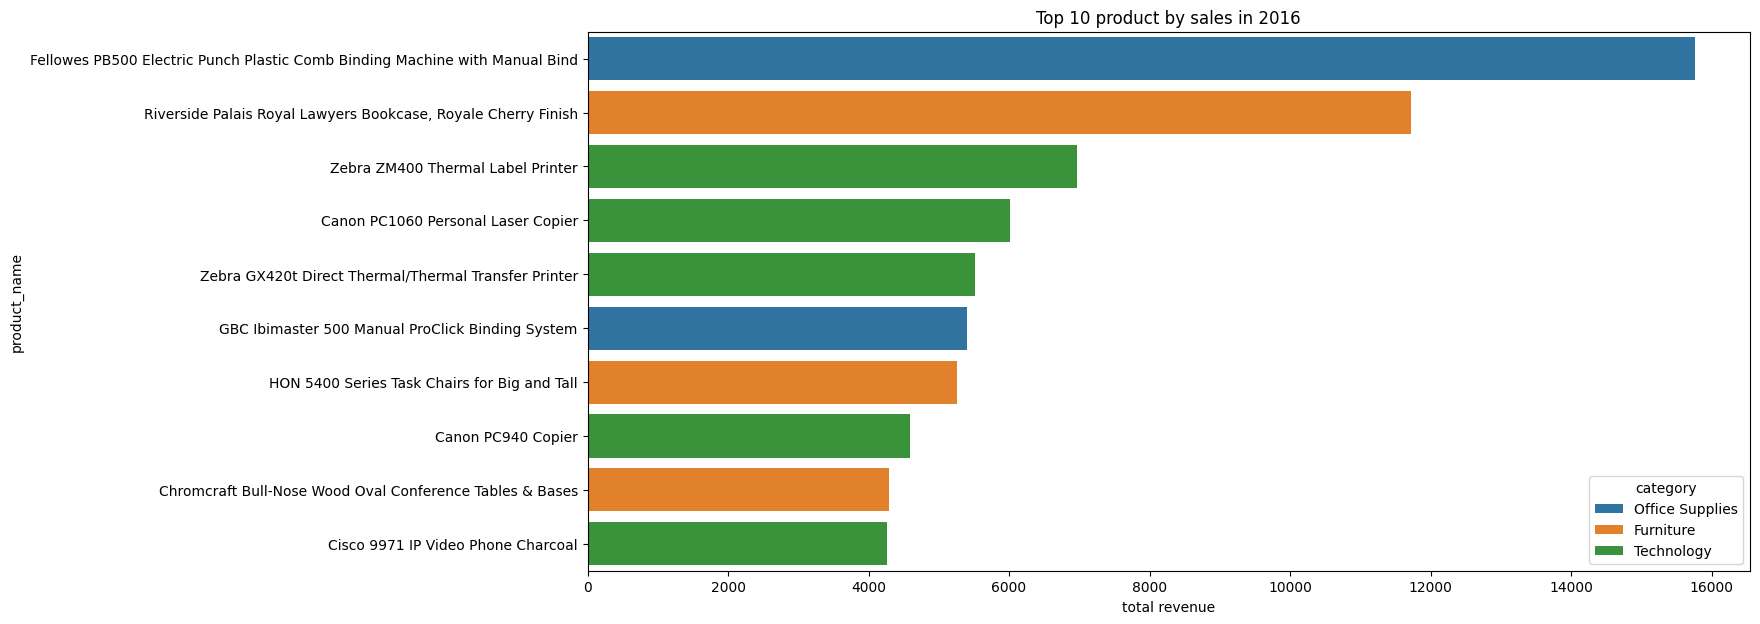

In [129]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(top_10_products_sales,x='total_sales',y='product_name',hue='category',legend=True)
plt.title('Top 10 product by sales in 2016')
plt.xlabel('total revenue')
plt.ylabel('product_name')
plt.show()